In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
from functions import *
import autoreload
import time

%matplotlib inline
autoreload??

In [2]:
RANDOM_SEED = 213473

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
image_rgb = cv2.cvtColor(cv2.imread('nike-basketball.png'), cv2.COLOR_BGR2RGB)

print(image_rgb.shape)

(1100, 880, 3)


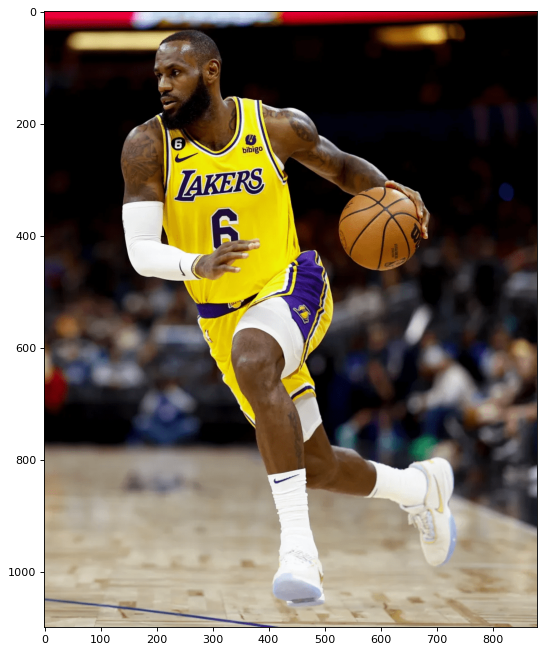

In [4]:
display_image(image_rgb)

# Task 1
Convert RGB image to Grayscale.

Open 'functions.py' and finish the following function: 'rgb_to_grayscale'.

Hint: use the following formula to convert RGB to grayscale: G = 0.299 * R + 0.587 * G + 0.114 * B.

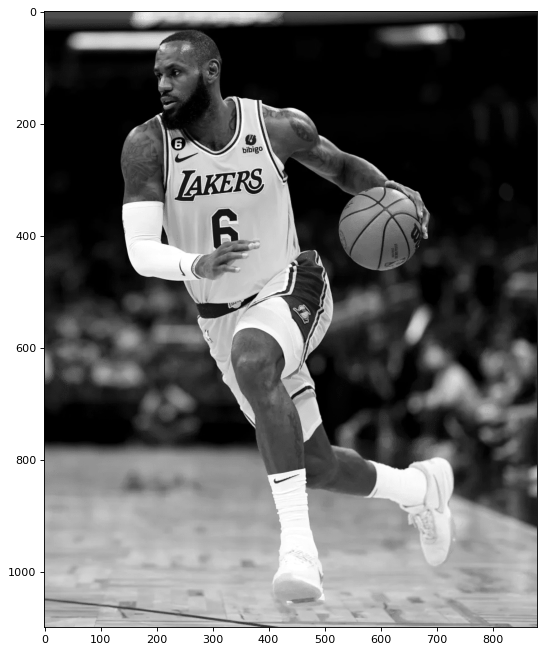

In [5]:
image_gray = rgb_to_grayscale(image_rgb)
display_image(image_gray)

# Task 2

Open 'functions.py' and finish the following function: 'apply_transformation'.

Hint: use loops.

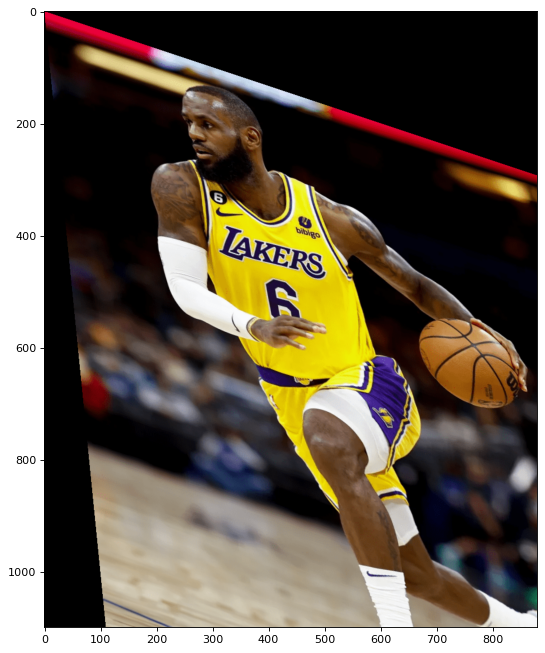

In [6]:
M =  np.array([
    [1, 0.4, 0],
    [0.1, 1.2, 0],
    [0, 0, 1],
])

display_image(apply_transformation(image_rgb, M))

# Task 3

The function 'apply_transformation' takes quite a bit time to process image. But this can be optimized. The optimized version of this function is 'apply_transformation_optimized'. Please explain below how this function is different to non-optimized one 'apply_transformation'. Please, provide more details and clearly explain why 'apply_transformation_optimized' processes images faster than 'apply_transformation'.

In [7]:
start = time.time()
apply_transformation(image_rgb, M)
end = time.time()
print('apply_transformation: %.2f seconds' % (end - start))

start = time.time()
apply_transformation_optimized(image_rgb, M)
end = time.time()
print('apply_transformation_optimized: %.2f seconds' % (end - start))

apply_transformation: 33.75 seconds
apply_transformation_optimized: 0.37 seconds


In [8]:
# Explain in comments
'''
apply_transformation_optimized:

Reshapes the input image into a 1D array of shape (height * width, channels) and similarly reshapes the resulting image to the original shape.
Calculates the inverse of the transformation matrix M_inv.
Generates a set of original coordinates C using meshgrid to cover all pixel locations in the original image.
Applies the transformation matrix to these coordinates C to compute the transformed coordinates V.
Rounds and converts the transformed coordinates to integers and checks if they fall within the bounds of the original image.
Creates a boolean mask indices to identify which transformed coordinates are valid (within bounds).
Updates the transformed image new_image by reordering the pixel values according to the valid transformed coordinates.

while apply_transformation:

Applies the transformation matrix directly to each pixel of the output image by looping through its height and width.
For each output pixel, it calculates the corresponding original coordinates using the inverse transformation matrix M_inv.
Interpolates between the original pixel values to determine the value of the output pixel. This interpolation accounts for fractional coordinates resulting from the transformation.
This function essentially transforms each pixel of the output image independently, considering its fractional location in the original image.

'''

# Task 4

Apply the following transformations:

1. Transform image to the new basis made of the following vectors: <1, 0.3> and <0.1, 1.2>:
2. Rotate 30 degrees clockwise takign top-left corner as the basis of the rotation.
3. Rotate 60 degrees counter-clockwise taking the center of the image as the basis of the rotation
4. Downscale image by factor of 2

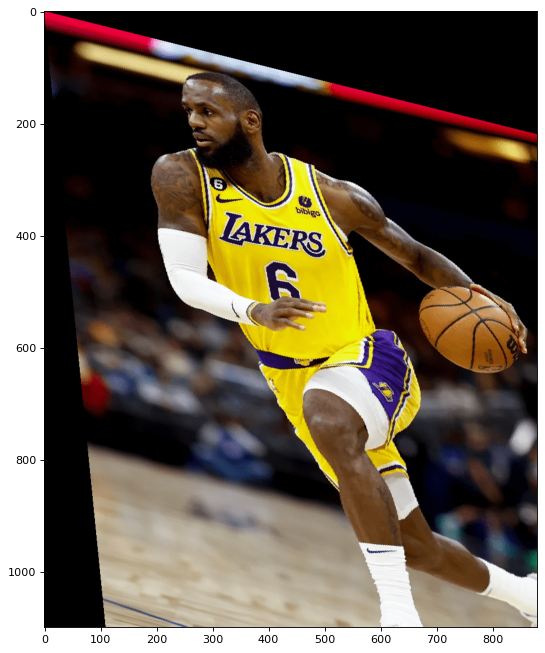

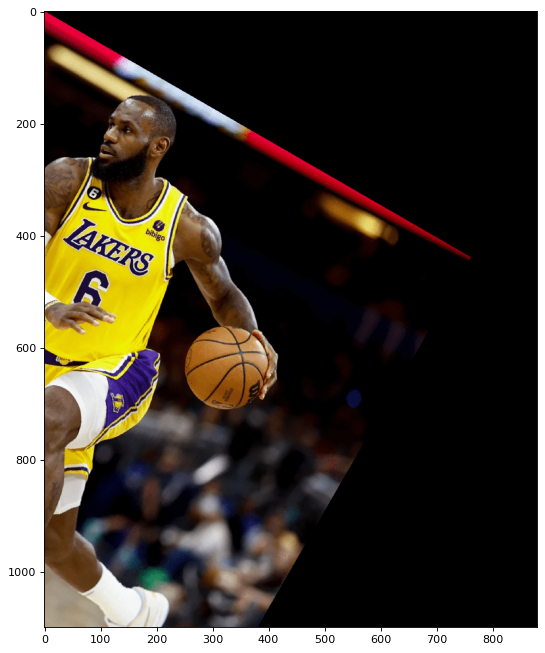

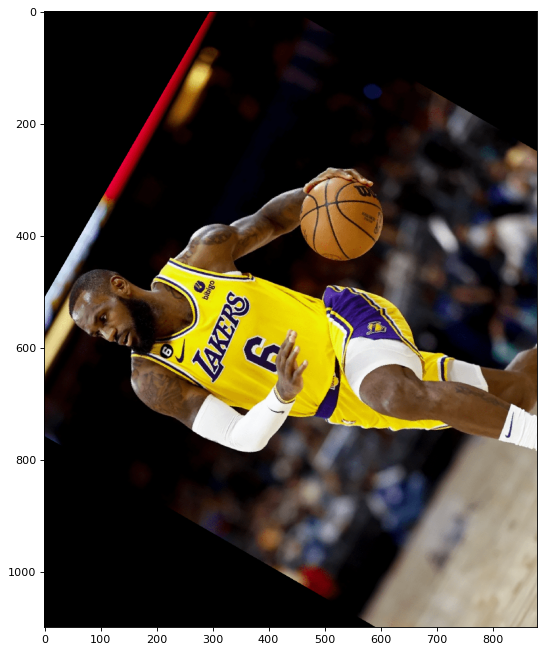

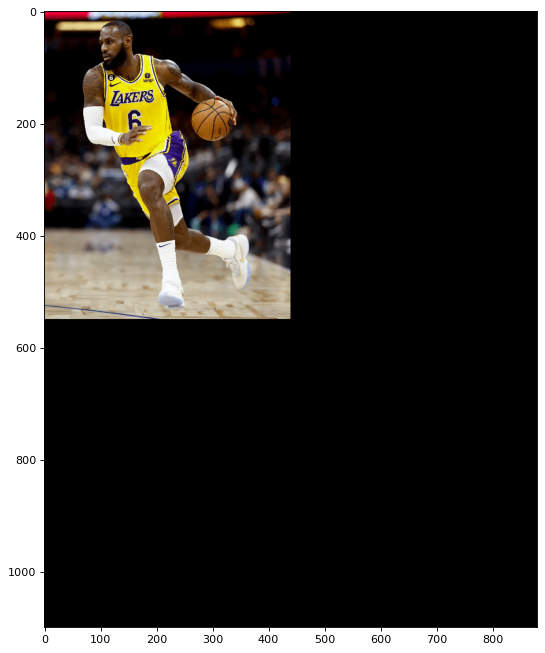

In [9]:
# YOUR CODE GOES HERE
# ...
# END
T1 = np.array([[1,0.3,0],
              [0.1,1.2,0],
              [0,0,1]])
angle = -30
radians = np.deg2rad(angle)
T2 = np.array([[np.cos(radians),-np.sin(radians),0],
              [np.sin(radians),np.cos(radians),0],
              [0,0,1]])
height, width = image_rgb.shape[:2]
center_x = width//2
center_y = height//2
angle = 60
radians = np.deg2rad(angle)
T3 = np.array([[np.cos(radians),-np.sin(radians),center_x*(1-np.cos(radians))+center_y*np.sin(radians)],
              [np.sin(radians),np.cos(radians),-center_x*np.sin(radians)+center_y*(1-np.cos(radians))],
              [0,0,1]])

T4 = np.array([[0.5,0,0],
              [0,0.5,0],
              [0,0,1]])

display_image(apply_transformation_optimized(image_rgb, T1))
display_image(apply_transformation_optimized(image_rgb, T2))
display_image(apply_transformation_optimized(image_rgb, T3))
display_image(apply_transformation_optimized(image_rgb, T4))

# Task 5

Finish the 'convolve_2d' function. Hint: use 2 loops.

In [10]:
M = np.array([
    [1, 2, 3, 4, 3, 2, 1],
    [2, 3, 4, 5, 6, 7, 8],
    [3, 4, 5, 6, 7, 8, 9],
    [2, 3, 4, 5, 4, 3, 2],
    [2, 3, 4, 3, 2, 1, 0],
])

kernel_1 = np.array([
    [-1, 0, 1]
])

kernel_2 = np.array([
    [-1],
    [0],
    [1],
])

kernel_3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])


print("Convolve using kernel 1:")
print(convolve_2d(M, kernel_1))

print("Convolve using kernel 2:")
print(convolve_2d(M, kernel_2))

print("Convolve using kernel 3:")
print(convolve_2d(M, kernel_3))

Convolve using kernel 1:
[[-2 -2 -2  0  2  2  2]
 [-3 -2 -2 -2 -2 -2  7]
 [-4 -2 -2 -2 -2 -2  8]
 [-3 -2 -2  0  2  2  3]
 [-3 -2  0  2  2  2  1]]
Convolve using kernel 2:
[[-2 -3 -4 -5 -6 -7 -8]
 [-2 -2 -2 -2 -4 -6 -8]
 [ 0  0  0  0  2  4  6]
 [ 1  1  1  3  5  7  9]
 [ 2  3  4  5  4  3  2]]
Convolve using kernel 3:
[[ -7  -6  -6  -2   2   2  11]
 [-12  -8  -8  -6  -4  -4  24]
 [-14  -8  -8  -6  -4  -4  26]
 [-13  -8  -6   0   4   4  15]
 [ -9  -6  -2   4   6   6   5]]


Below, the optimized version 'convolve_2d_optimized' of the 'convolve_2d' function. The results should be the same.

In [11]:
print("Convolve using kernel 1:")
print(convolve_2d_optimized(M, kernel_1))

print("Convolve using kernel 2:")
print(convolve_2d_optimized(M, kernel_2))

print("Convolve using kernel 3:")
print(convolve_2d_optimized(M, kernel_3))

Convolve using kernel 1:
[[-2 -2 -2  0  2  2  2]
 [-3 -2 -2 -2 -2 -2  7]
 [-4 -2 -2 -2 -2 -2  8]
 [-3 -2 -2  0  2  2  3]
 [-3 -2  0  2  2  2  1]]
Convolve using kernel 2:
[[-2 -3 -4 -5 -6 -7 -8]
 [-2 -2 -2 -2 -4 -6 -8]
 [ 0  0  0  0  2  4  6]
 [ 1  1  1  3  5  7  9]
 [ 2  3  4  5  4  3  2]]
Convolve using kernel 3:
[[ -7  -6  -6  -2   2   2  11]
 [-12  -8  -8  -6  -4  -4  24]
 [-14  -8  -8  -6  -4  -4  26]
 [-13  -8  -6   0   4   4  15]
 [ -9  -6  -2   4   6   6   5]]


# Task 6

Finish 'gaussian_kernel' and 'gaussian_blur' functions. 'gaussian_kernel' function should return a kernel of the given size and sigma for the convolution and 'gaussian_blur' function should blur the image using the gaussian kernel. The formula is given below:

![alt text](gaussian_blur_formula.jpeg "Formula")

Kernel:
[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]


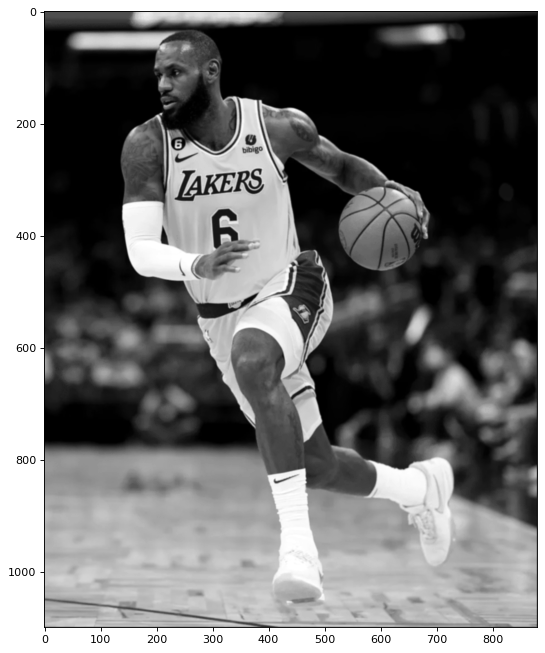

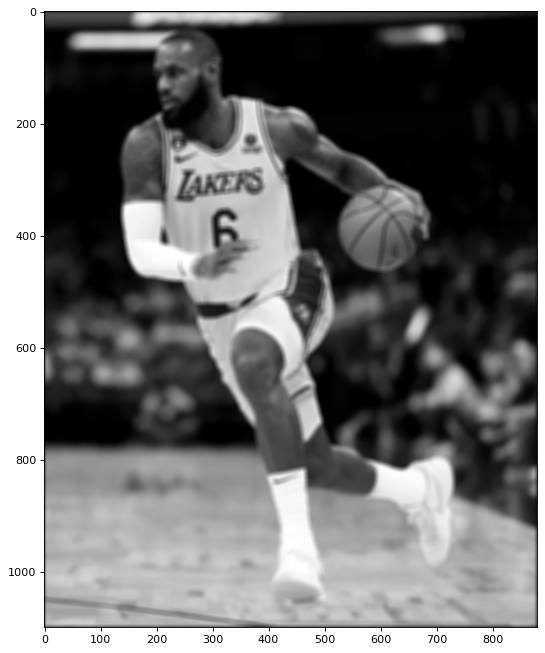

In [12]:
kernel = gaussian_kernel(3, 1)
print("Kernel:")
print(kernel)

blurred = gaussian_blur(image_gray, 3, 1)
display_image(blurred)


blurred = gaussian_blur(image_gray, 11, 9)
display_image(blurred)

# Task 7

Finish the 'sobel_edge_detection' function. The function should return gradient magnitudes and angles.

Hint: use arctan2 to get gradient orientations.

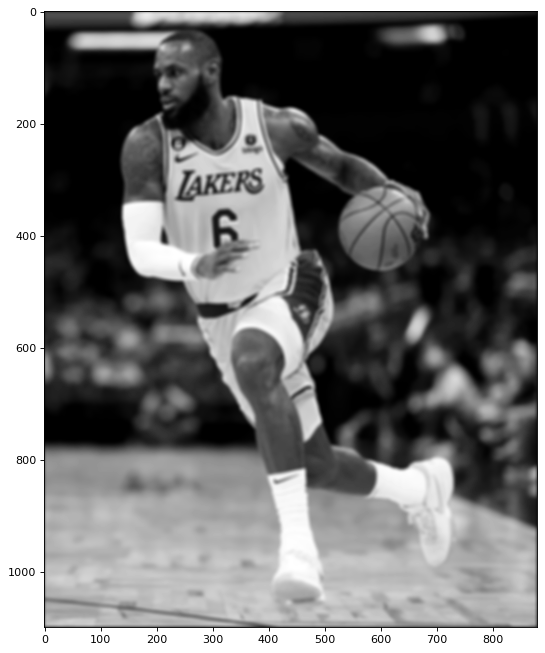

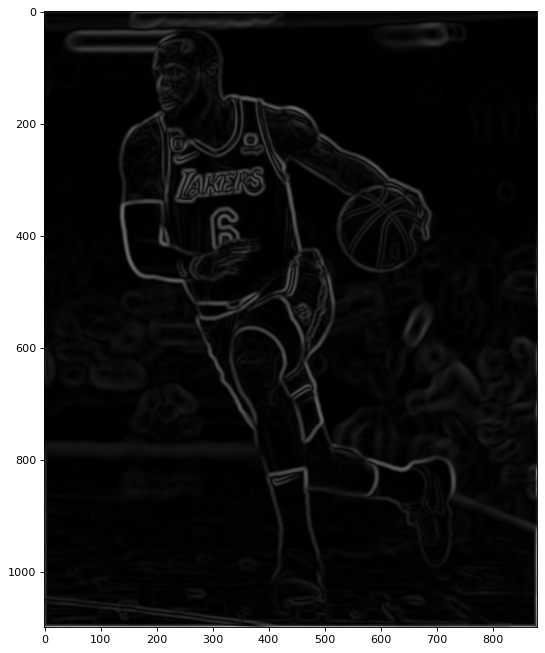

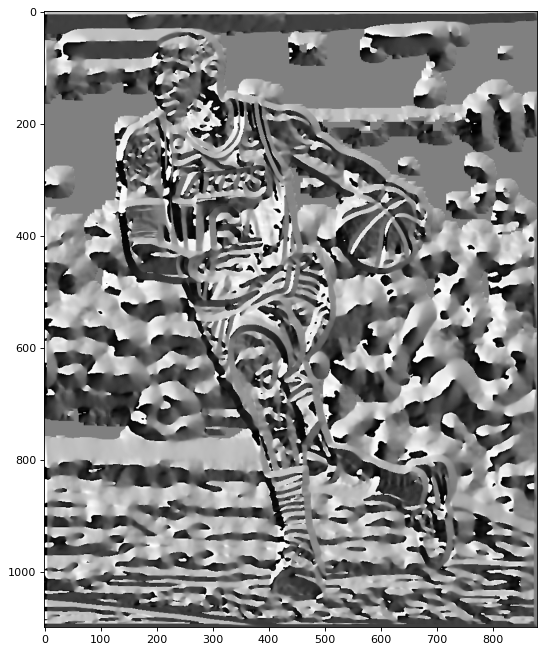

In [13]:
blurred = gaussian_blur(image_gray, 11, 3)
display_image(blurred)

magnitudes, angles = sobel_edge_detection(blurred)
display_image(magnitudes)
display_image(angles)

# Task 8

Finish the 'non_max_suppression' function. The function should remove unnecessary edges.

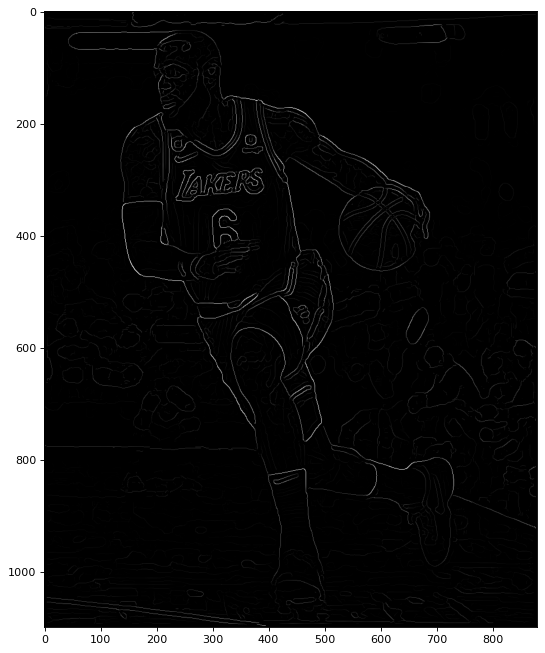

In [14]:
filtered_edges = non_max_suppression(magnitudes, angles)
display_image(filtered_edges)

# Task 9

Finish the 'hysteresis' function. The function should return strong and weak edges.

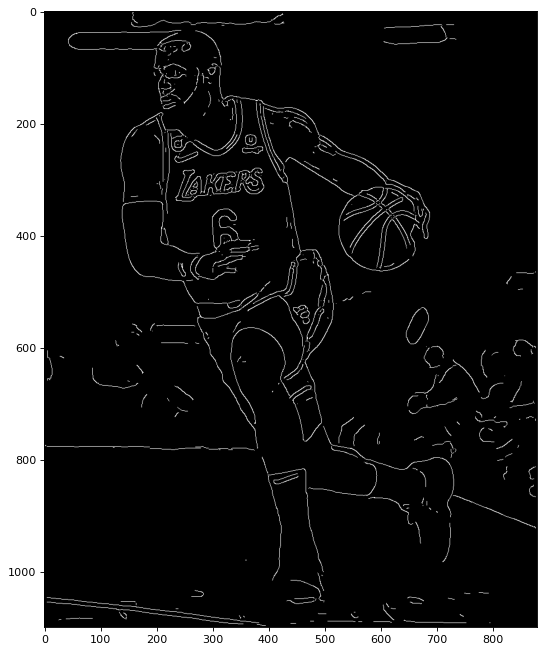

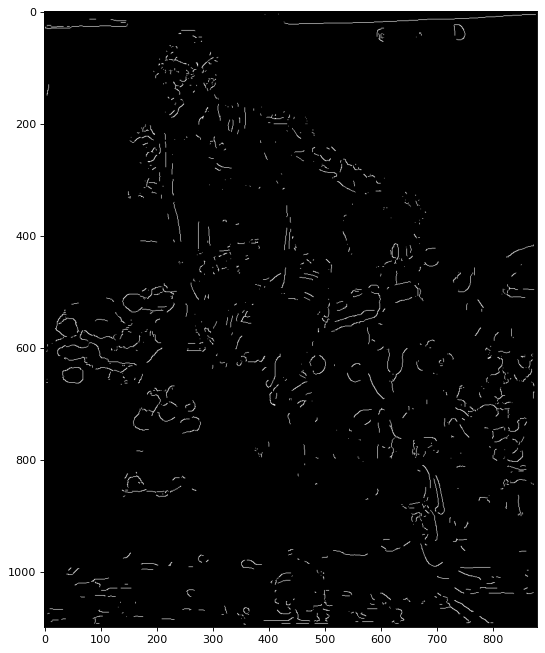

In [15]:
strong, weak = hysteresis(filtered_edges, 20, 40)


display_image(strong)
display_image(weak)

# Task 9

Finish the 'edge_analysis' function. The function should change weak edges to strong edges based on connectivity analysis using DFS.

In [16]:
edges = edge_analysis(strong, weak)

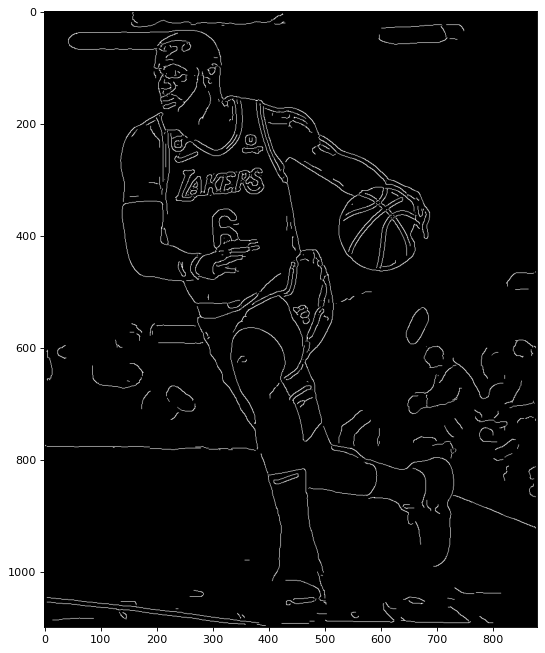

In [17]:
display_image(edges)

# Task 10

Finish the 'canny_edge_detection' function. The function should apply Canny Edge Detection algorithm using Sobel filters

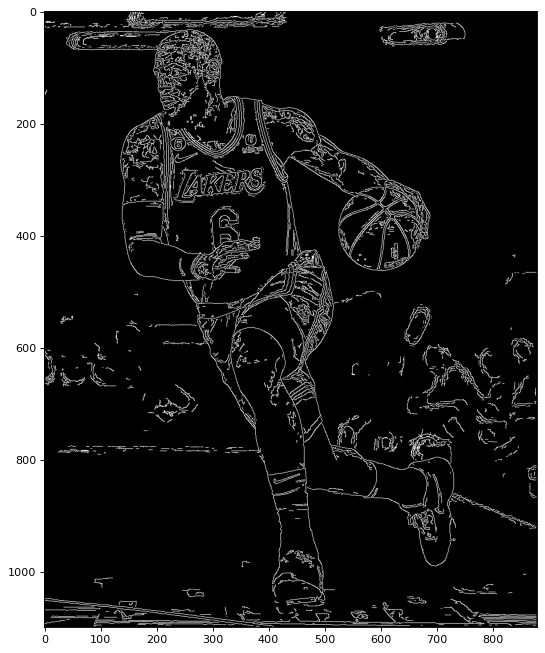

In [18]:
edges = canny_edge_detection(image_rgb, 11, 3, 20, 70)
display_image(edges)